In [1]:
pip install numpy pillow


Note: you may need to restart the kernel to use updated packages.


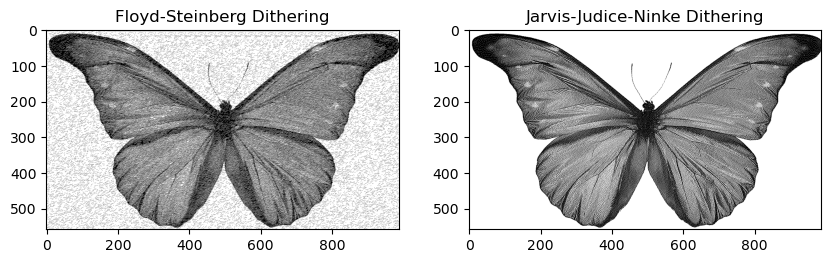

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# convert to grayscale
image_path = r'C:\Users\pbsjy\Downloads\butterfly_image.png'  
image = Image.open(image_path).convert('L')  
image_array = np.array(image) / 255.0  


# Floyd-Steinberg Dithering
def floyd_steinberg_dithering(image_array):
    dithered_image = np.copy(image_array)
    rows, cols = dithered_image.shape
    for y in range(rows):
        for x in range(cols):
            old_pixel = dithered_image[y, x]
            new_pixel = round(old_pixel)
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            if x + 1 < cols:
                dithered_image[y, x + 1] += quant_error * 11 / 16
            if y + 1 < rows and x - 1 >= 0:
                dithered_image[y + 1, x - 1] += quant_error * 10 / 16
            if y + 1 < rows:
                dithered_image[y + 1, x] += quant_error * 7 / 16
            if y + 1 < rows and x + 1 < cols:
                dithered_image[y + 1, x + 1] += quant_error * 6 / 16

    return dithered_image

# Jarvis-Judice-Ninke Dithering
def jarvis_judice_ninke_dithering(image_array):
    dithered_image = np.copy(image_array)
    rows, cols = dithered_image.shape
    diffusion_matrix = [[0, 0, 0, 7, 5], [3, 5, 7, 5, 3], [1, 3, 5, 3, 1]]
    diffusion_factor = 48

    for y in range(rows):
        for x in range(cols):
            old_pixel = dithered_image[y, x]
            new_pixel = round(old_pixel)
            dithered_image[y, x] = new_pixel
            quant_error = old_pixel - new_pixel

            for dy in range(3):
                for dx in range(-2, 3):
                    if 0 <= y + dy < rows and 0 <= x + dx < cols:
                        dithered_image[y + dy, x + dx] += quant_error * diffusion_matrix[dy][dx + 2] / diffusion_factor

    return dithered_image


floyd_steinberg_result = floyd_steinberg_dithering(image_array)
jarvis_judice_ninke_result = jarvis_judice_ninke_dithering(image_array)


floyd_steinberg_image = Image.fromarray((floyd_steinberg_result * 255).astype(np.uint8))
jarvis_judice_ninke_image = Image.fromarray((jarvis_judice_ninke_result * 255).astype(np.uint8))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(floyd_steinberg_image, cmap='gray')
plt.title('Floyd-Steinberg Dithering')
plt.subplot(1, 2, 2)
plt.imshow(jarvis_judice_ninke_image, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithering')
plt.show()


floyd_steinberg_image.save('floyd_steinberg_dithered.jpg')
jarvis_judice_ninke_image.save('jarvis_judice_ninke_dithered.jpg')


In [12]:
import time


start_time = time.time()
floyd_steinberg_result = floyd_steinberg_dithering(image_array)
floyd_steinberg_time = time.time() - start_time


start_time = time.time()
jarvis_judice_ninke_result = jarvis_judice_ninke_dithering(image_array)
jarvis_judice_ninke_time = time.time() - start_time

print(f"Floyd-Steinberg Dithering Time: {floyd_steinberg_time:.4f} seconds")
print(f"Jarvis-Judice-Ninke Dithering Time: {jarvis_judice_ninke_time:.4f} seconds")


Floyd-Steinberg Dithering Time: 2.7904 seconds
Jarvis-Judice-Ninke Dithering Time: 9.5183 seconds


In [ ]:
Floyd-Steinberg Dithering:
Features: Simple to operate error diffusion technique that spreads quantization errors to nearby pixels, giving the pattern a more "noisy" or dispersed appearance.
Visual Impact: It often results in increased noise or grain, particularly in low-contrast regions.
Detail Preservation: Dithering pattern looks noisier and rougher, but it preserves minute details better.
Execution Time:2.7904 seconds(faster because of the smaller error diffusion kernel)

Jarvis-Judice-Ninke Dithering:
Features: Spreads the quantization error across a broader region by using a larger error diffusion kernel, which produces smoother transitions.
Visual Impact: Offers smoother dithering with a cleaner appearance and less discernible graininess.
Detail preservation: Gives up some intricate details to provide a more polished, homogeneous look.
Execution Time: 9.5183 seconds (less time because of more intricate operations and a larger error diffusion kernel)
    

Comparison:
1.Floyd-Steinberg introduces more visible noise, while Jarvis-Judice-Ninke produces smoother, cleaner results.
2.Floyd-Steinberg preserves more fine details but adds noticeable noise. Jarvis-Judice-Ninke smooths out these details and creates a more visually appealing image.
3.Floyd-Steinberg is faster and better for preserving details, while Jarvis-Judice-Ninke is slower but gives smoother, cleaner images, making it ideal for applications requiring high-quality results.

